In [19]:
import pandas as pd
import folium 
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
 

In [5]:
file_path = "./서울20년1월부터12월.xlsx"
ele_seoul20 = pd.read_excel(file_path)


In [6]:
file1_path = "./서울21년1월부터12월.xlsx"
ele_seoul21 = pd.read_excel(file1_path)

In [27]:
file2_path = "./서울전기차충전소.xlsx"
ele = pd.read_excel(file1_path)

In [28]:
ele

,Unnamed: 0,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,2,남서울,강남,LH강남힐스테이트,급속01,6452,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,26.37,0,38,2021-01-01,2021-01-01 21:46:05,2021-01-01 22:24:33,서울특별시,강남구,자곡동 자곡로3길 21
1,9,남서울,서초,아크로리버파크,완속01,3848,서울특별시 서초구 반포동 2-12,완속,7.0,11.00,2,21,2021-01-01,2021-01-01 21:24:22,2021-01-01 23:45:30,서울특별시,서초구,반포동 2-12
2,18,남서울,강남,타워팰리스1차,완속03,2343,서울특별시 강남구 도곡동 언주로30길 56,완속,7.0,50.00,8,0,2021-01-01,2021-01-01 15:26:41,2021-01-01 23:26:44,서울특별시,강남구,도곡동 언주로30길 56
3,21,남서울,강남,대치2문화센터 공영주차장,급속01,9546,서울특별시 강남구 영동대로65길 24,급속,50.0,6.47,0,12,2021-01-01,2021-01-01 23:43:01,2021-01-01 23:55:23,서울특별시,강남구,영동대로65길 24
4,22,서울,서대문은평,연세대학교,급속02,9660,"서울특별시 서대문구 연세로 50 (신촌동, 연세대학교)",급속,50.0,12.18,0,15,2021-01-01,2021-01-01 23:43:34,2021-01-01 23:58:49,서울특별시,서대문구,"연세로 50 (신촌동, 연세대학교)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304721,2097119,서울,광진성동,뚝도충전소,급속01,828,서울특별시 광진구 자양3동 510-8,급속,50.0,8.61,0,17,2021-10-17,2021-10-17 12:33:53,2021-10-17 12:51:33,서울특별시,광진구,자양3동 510-8
304722,2097124,서울,마포용산,마포래미안푸르지오 1단지,급속01,6251,서울특별시 마포구 아현동 마포대로 195,급속,50.0,33.88,0,45,2021-10-17,2021-10-17 20:13:13,2021-10-17 20:58:46,서울특별시,마포구,아현동 마포대로 195
304723,2097126,서울,서울직할,국립중앙극장,급속02,9903,"서울특별시 중구 장충단로 59 (장충동2가, 국립극장)",급속,50.0,26.58,1,36,2021-10-17,2021-10-17 19:21:25,2021-10-17 20:58:13,서울특별시,중구,"장충단로 59 (장충동2가, 국립극장)"
304724,2097127,남서울,관악동작,관악동작 견인차량 보관소,급속01,6904,서울특별시 관악구 신사로 7,급속,50.0,24.27,0,56,2021-10-17,2021-10-16 23:16:43,2021-10-17 00:13:29,서울특별시,관악구,신사로 7


In [8]:
ele_seoul20 = ele_seoul20.drop("Unnamed: 0", axis=1)

In [29]:
ele = ele.drop("Unnamed: 0", axis=1)

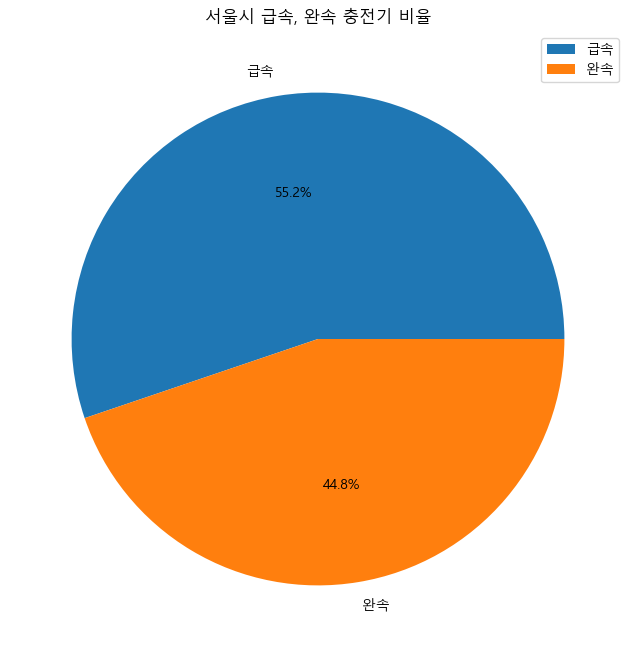

In [24]:
# 급속, 완속 충전기 갯수 구하기
count_charger = ele_seoul20.groupby('충전기구분')['충전소명'].nunique()
count_charger = count_charger.reset_index(drop=False).rename(columns={'충전소명': '충전소 갯수'})


plt.figure(figsize=(8, 8))
plt.pie(count_charger['충전소 갯수'], labels=count_charger['충전기구분'], autopct='%1.1f%%')
plt.title('서울시 급속, 완속 충전기 비율')
plt.legend()
plt.show()

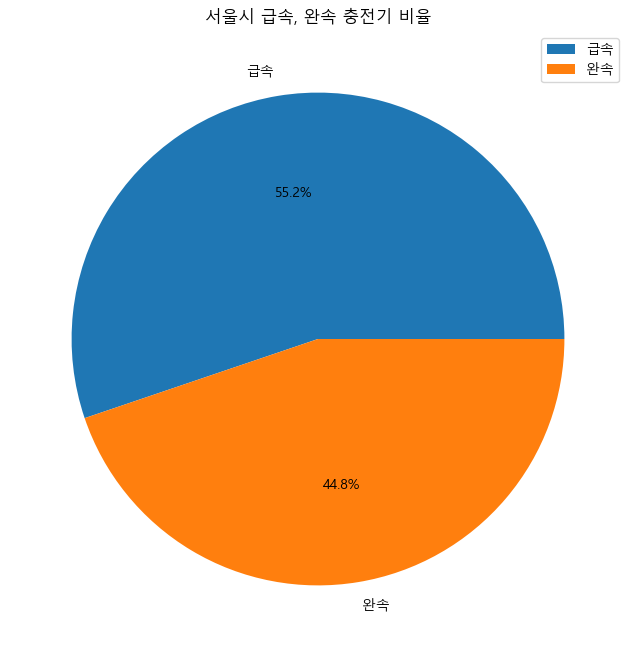

In [30]:
# 급속, 완속 충전기 갯수 구하기
ele_charger = ele.groupby('충전기구분')['충전소명'].nunique()
ele_charger = ele_charger.reset_index(drop=False).rename(columns={'충전소명': '충전소 갯수'})


plt.figure(figsize=(8, 8))
plt.pie(count_charger['충전소 갯수'], labels=ele_charger['충전기구분'], autopct='%1.1f%%')
plt.title('서울시 급속, 완속 충전기 비율')
plt.legend()
plt.show()

In [26]:
count_charger

,충전기구분,충전소 갯수
0,급속,525
1,완속,426


In [31]:
ele_charger

,충전기구분,충전소 갯수
0,급속,583
1,완속,430
